# **California House Price Prediction** 

### **Business Problem Understanding**

**Context**

House prices are influenced by various factors, making them a crucial concern for both individuals and society. The key factor is location, with proximity to job centers, educational institutions, and other infrastructures having a significant impact on property values. Additionally, within properties, features like the number of bedrooms, bathrooms, and overall condition also affect their value.

Furthermore, economic conditions and interest rates exert substantial influence on the housing market. Thriving economies often increase demand and prices. Understanding this complex interplay of infrastructure, neighborhood, property features, and economic considerations is essential for making effective and wise housing decisions, ensuring housing affordability and stability within society.

**Problem Statement**

The nature of house prices, are influenced by an array of factors, posing a significant challenge for individuals and societ at large. The primary issues lies in understanding and preducting these fluctuations to make informed decisions regarding property investment. Key determinants such as location, infrastructurem property attributes, and economic conditions. 

**Goal**

Hence, it is essential to develop a reliable model that can accurately forecast house prices. This predictive model aims to empower individuals to make informed housing choices ensuring housing affordability. 

**Analytic Approach**

Perform data Analysis to get insight on the data distribution, Handling the outliers, Split the data, preprocess the data for missing values, change categorical columns to numetical and scale the numerical values. Continue by performing cross validation to help asses the best model. Perform Benchmark to provide a baseline for comparing models similar in values. Hyperparameter Tuning the best model after benchmark and compare result from Actual to Before & After Tuning


### **Data Understanding**

**Attributes Information**

| **Attribute**        | **Data Type** | **Description**                           |
| -------------------- | ------------- | ----------------------------------------- |
| longitude            | Float         | Longitude coordinates of the location    |
| latitude             | Float         | Latitude coordinates of the location     |
| housing_median_age   | Float         | Median age of housing in the area         |
| total_rooms          | Integer       | Total number of rooms in the area         |
| total_bedrooms       | Float         | Total number of bedrooms in the area      |
| population           | Integer       | Total population in the area              |
| households           | Integer       | Total number of households in the area    |
| median_income        | Float         | Median income of households in the area   |
| ocean_proximity      | Object        | Proximity of the area to the ocean        |
| median_house_value   | Float         | Median house value in the area            |


- Number of rows: 14,448
- Number of non-null values in the "total_bedrooms" column: 14,311 (some missing values)
- Data types: The majority of columns are of type float64, and "ocean_proximity" is of type object (categorical).

In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# test split
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

In [16]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [18]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [19]:
df.duplicated().sum()

0

### **EDA**

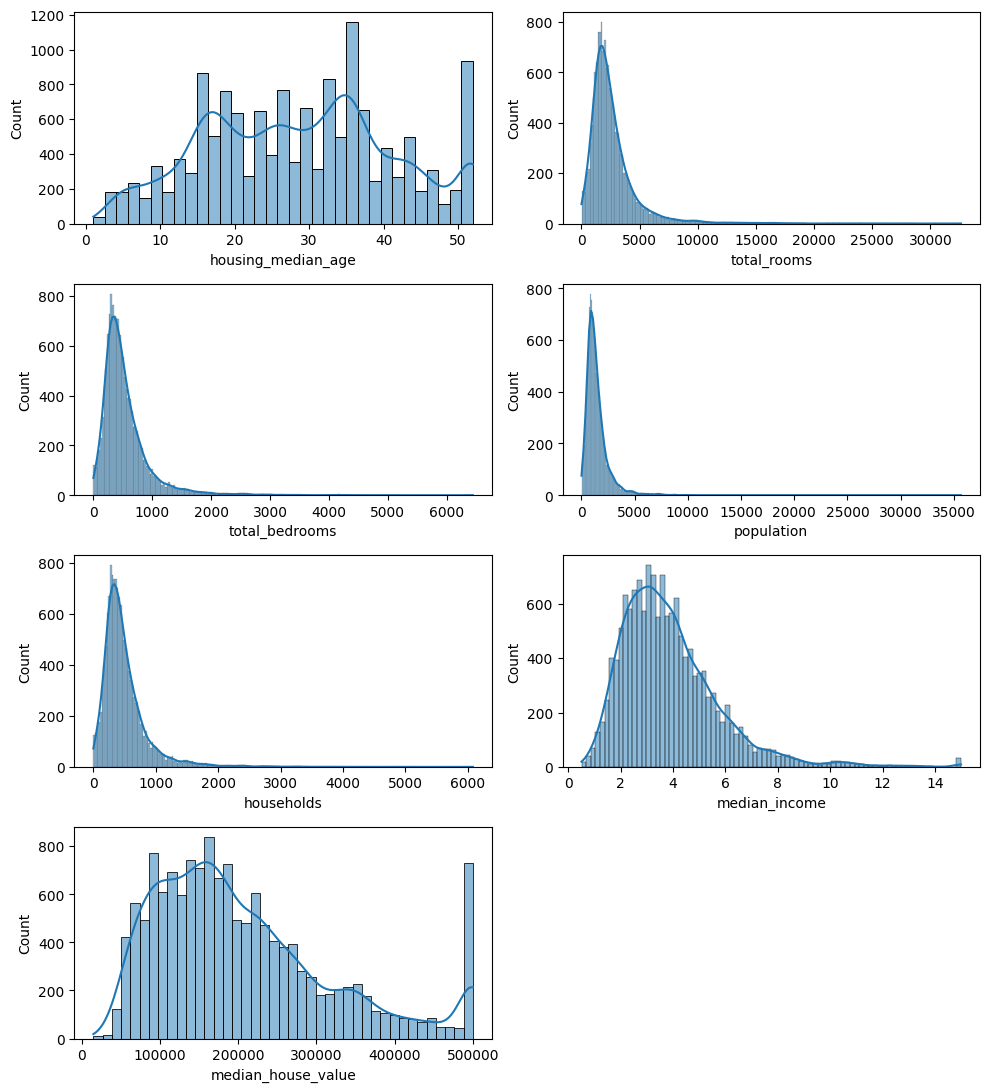

In [20]:
plt.figure(figsize=(10, 16))
pltnum = 1

# Filter columns that are numeric (excluding 'longitude' and 'latitude')
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove 'longitude' and 'latitude' from num_cols
num_cols = [col for col in num_cols if col not in ['longitude', 'latitude']]

for column in num_cols:
    plt.subplot(6, 2, pltnum)
    sns.histplot(data=df, x=column, kde=True)
    pltnum += 1

plt.tight_layout()
plt.show()


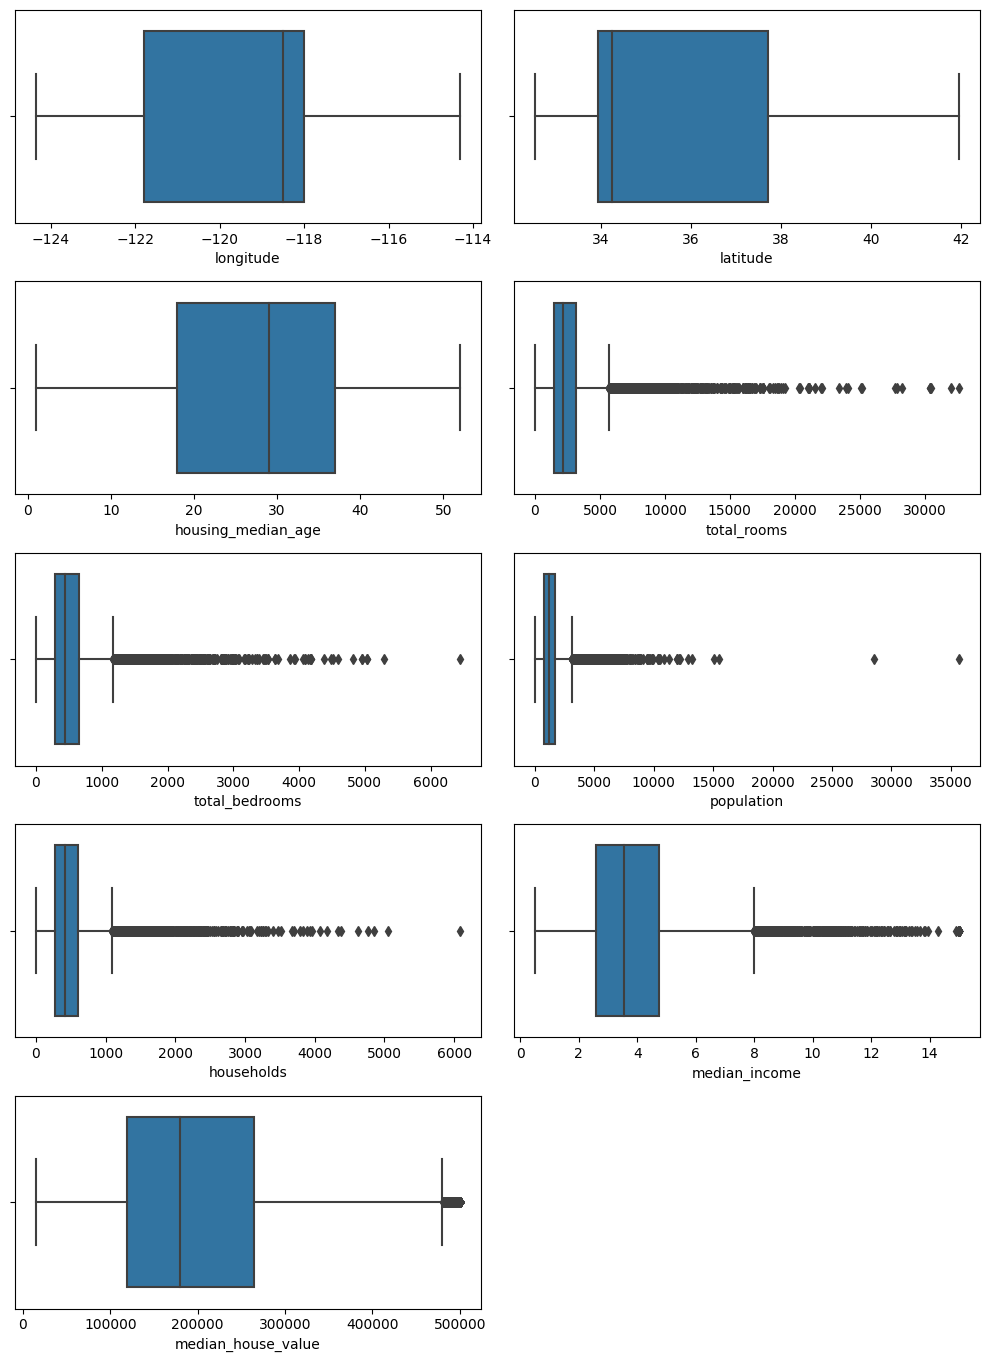

In [21]:
plt.figure(figsize=(10,16))
pltnum = 1
# filter columns that are numeric 
num_cols = df.select_dtypes(include=['int', 'float']).columns

for column in num_cols:
    plt.subplot(6,2,pltnum)
    sns.boxplot(data=df, x=column)
    pltnum += 1
    
plt.tight_layout()
plt.show()

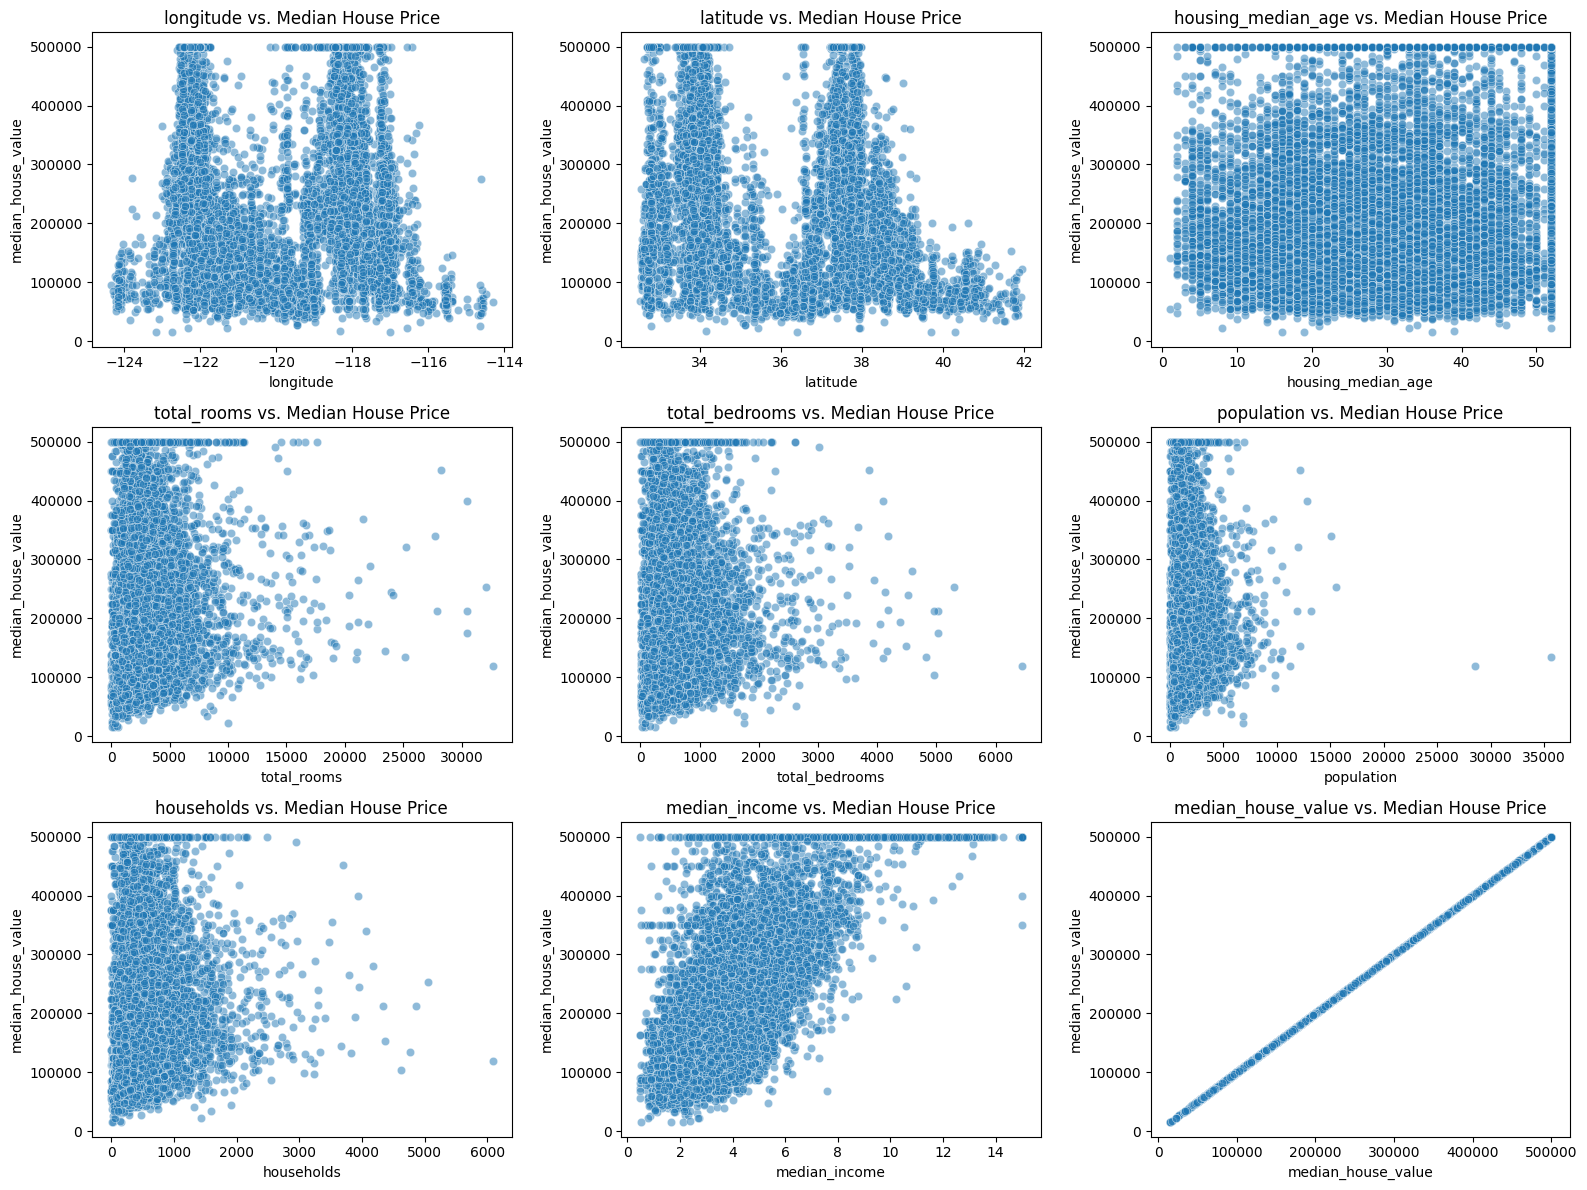

median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045915
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64


In [22]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=col, y='median_house_value', data=df, alpha=0.5)
    plt.title(f'{col} vs. Median House Price')

plt.tight_layout()
plt.show()

correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)

print(correlation_with_target)

In [23]:
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_with_target

median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045915
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64

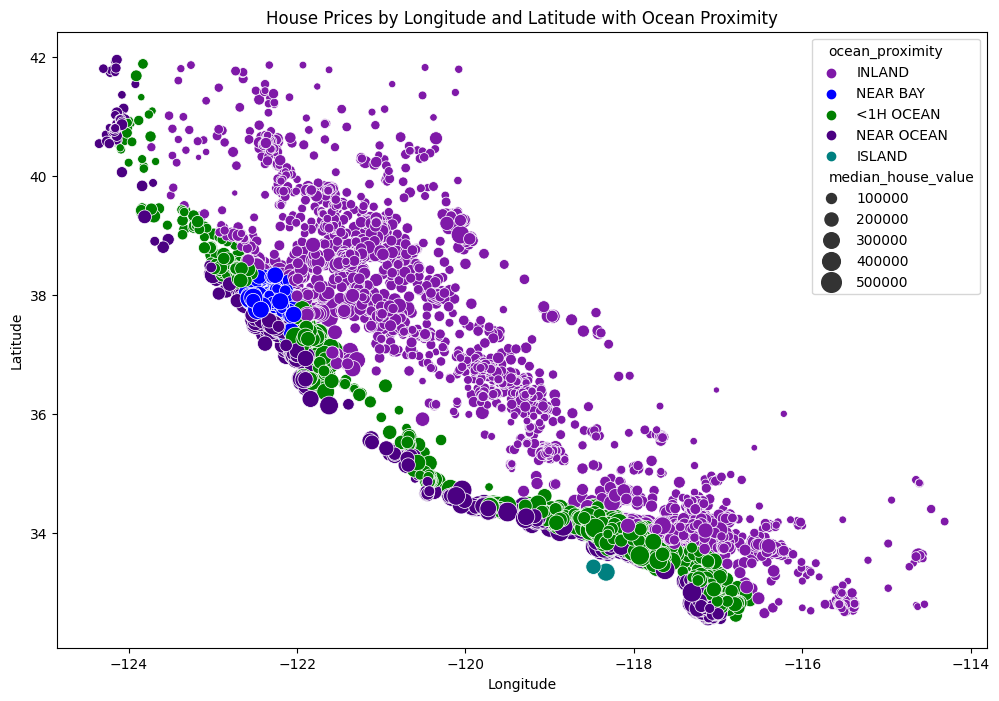

In [24]:
ocean_proximity_colors = {
    'INLAND': (0.498, 0.098, 0.659),  
    'NEAR BAY': (0.000, 0.000, 1.000), 
    'NEAR OCEAN': (0.294, 0.000, 0.510), 
    'ISLAND': (0.000, 0.502, 0.502),  
    '<1H OCEAN': (0.000, 0.502, 0.000)  
}

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', size='median_house_value', sizes=(20, 200), data=df, palette=ocean_proximity_colors)

plt.title('House Prices by Longitude and Latitude with Ocean Proximity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

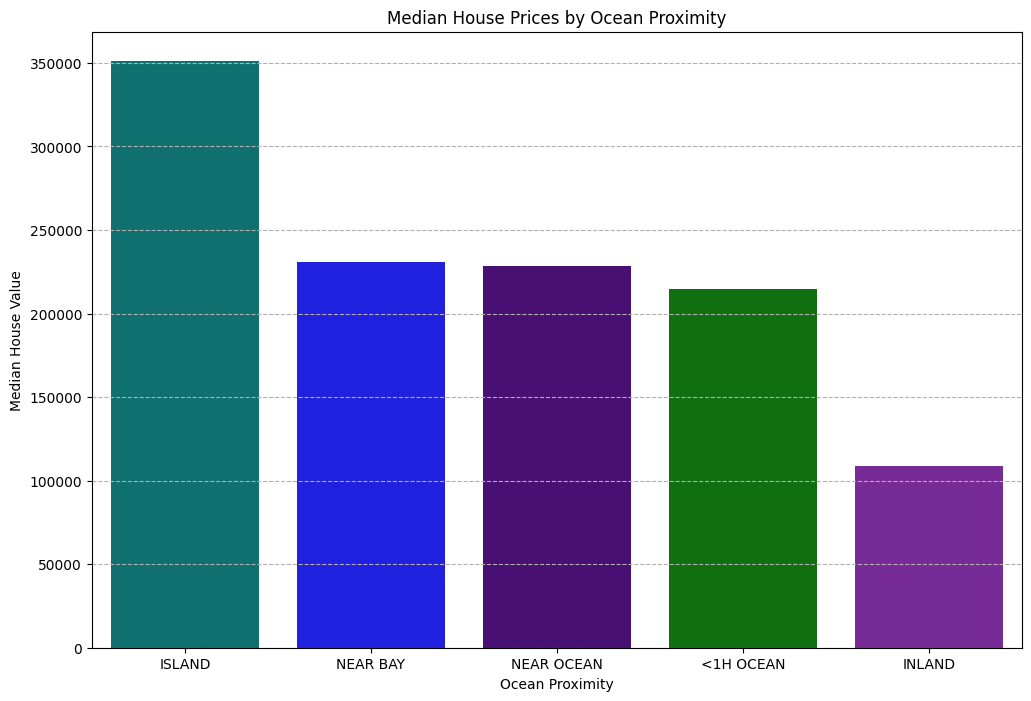

  ocean_proximity  median_house_value
2          ISLAND            351100.0
3        NEAR BAY            230800.0
4      NEAR OCEAN            228600.0
0       <1H OCEAN            214800.0
1          INLAND            108800.0


In [25]:
# Median house prices by ocean proximity with custom colors
median_values = df.groupby('ocean_proximity')['median_house_value'].median().reset_index()
median_values = median_values.sort_values(by='median_house_value', ascending=False)

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='ocean_proximity', y='median_house_value', data=median_values, palette=ocean_proximity_colors)

plt.title('Median House Prices by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.grid(axis='y', linestyle='--')

plt.show()

print(median_values)

- **ISLAND**: Areas classified as "ISLAND" have the highest median house value, with a median value of $351,100.
- **NEAR BAY**: "NEAR BAY" areas have the second-highest median house value, at $230,800.
- **NEAR OCEAN**: "NEAR OCEAN" areas follow closely with a median house value of $228,600.
- **<1H OCEAN**: Locations labeled "<1H OCEAN" have a median house value of $214,800.
- **INLAND**: Lastly, "INLAND" areas have the lowest median house value among the categories, with a value of $108,800.

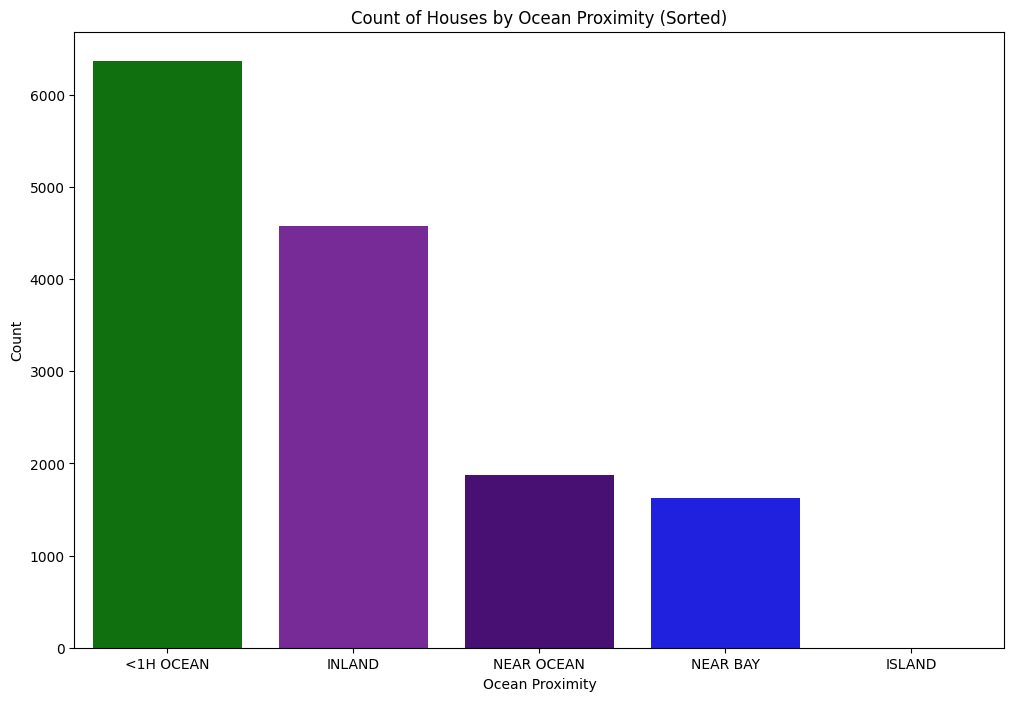

  ocean_proximity  count
0       <1H OCEAN   6369
1          INLAND   4576
2      NEAR OCEAN   1879
3        NEAR BAY   1622
4          ISLAND      2


In [26]:
# Count of houses by ocean proximity with custom colors
count_house = df['ocean_proximity'].value_counts().reset_index()
count_house.columns = ['ocean_proximity', 'count']
count_house = count_house.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 8))
count_plot = sns.countplot(x='ocean_proximity', data=df, palette=ocean_proximity_colors, order=count_house['ocean_proximity'])

plt.title('Count of Houses by Ocean Proximity (Sorted)')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')

plt.show()

print(count_house)

- **<1H OCEAN**: The category "<1H OCEAN" has the highest count of houses, with 6,369 properties falling within this ocean proximity.
- **INLAND**: The "INLAND" category is the second most populous, with 4,576 houses located in inland areas.
- **NEAR OCEAN**: "NEAR OCEAN" areas have a count of 1,879 houses.
- **NEAR BAY**: "NEAR BAY" regions follow with 1,622 houses.
- **ISLAND**: The "ISLAND" category has the lowest count of houses, with only 2 properties.

### **Handling Outliers**

In [27]:
def check_outliers(df, column_name):
    # Calculate quartiles (Q1 and Q3)
    q1 = np.percentile(df[column_name].values, 25)
    q3 = np.percentile(df[column_name].values, 75)

    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = (df[column_name].values < lower) | (df[column_name].values > upper)

    num_outliers = np.sum(outliers)

    print(f"==== {column_name} ====")
    print("Lower Bound:", lower)
    print("Upper Bound:", upper)
    print(f"Number of Outliers: {num_outliers} \n")


In [28]:
columns_to_check = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for cols in columns_to_check:
    check_outliers(df, cols)

==== total_rooms ====
Lower Bound: -1094.5
Upper Bound: 5693.5
Number of Outliers: 900 

==== total_bedrooms ====
Lower Bound: nan
Upper Bound: nan
Number of Outliers: 0 

==== population ====
Lower Bound: -626.0
Upper Bound: 3134.0
Number of Outliers: 827 

==== households ====
Lower Bound: -208.5
Upper Bound: 1091.5
Number of Outliers: 842 

==== median_income ====
Lower Bound: -0.6776500000000012
Upper Bound: 7.984350000000001
Number of Outliers: 482 

==== median_house_value ====
Lower Bound: -96850.0
Upper Bound: 480350.0
Number of Outliers: 757 



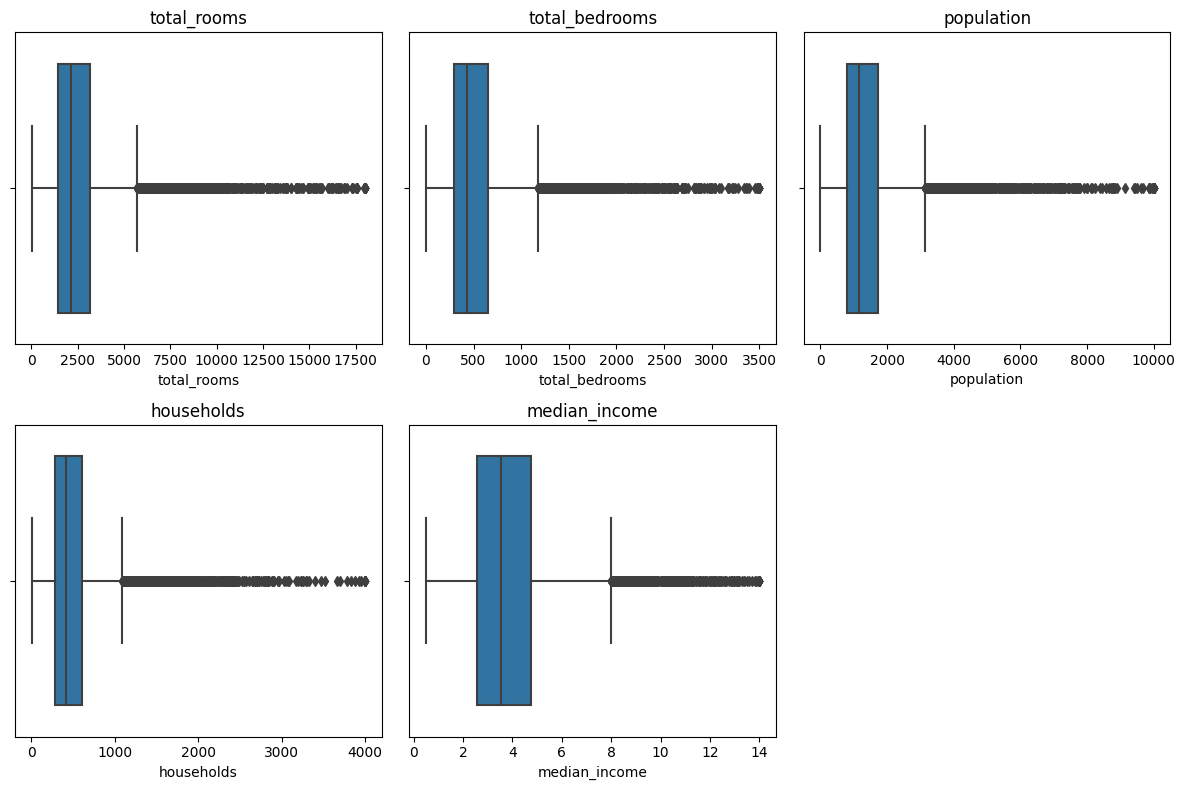

In [29]:
thresholds = {
    'total_rooms': 18000,
    'total_bedrooms': 3500,
    'population': 10000,
    'households': 4000,
    'median_income': 14
}

for col, threshold in thresholds.items():
    df[col] = np.where(df[col] > threshold, threshold, df[col])

plt.figure(figsize=(12, 8))
for i, col in enumerate(thresholds.keys(), 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(col)
    
plt.tight_layout()
plt.show()

### **Data Splitting**

In [30]:
# Define X and y value
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [31]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

### **Preprocessing**

In [32]:
# Create pipelines for scaling
std_pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

rbst_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('rbst_scaler', RobustScaler())
])

# Select numerical columns excluding 'longitude', 'latitude', and 'housing_median_age'
rbst_num_attribs = df.select_dtypes(include=['number']).columns.difference(['longitude', 'latitude', 'housing_median_age', 'median_house_value'])
std_attribs = ['longitude', 'latitude', 'housing_median_age']
cat_attribs = ['ocean_proximity']

# Define the ColumnTransformer
transformer = ColumnTransformer([
    ('num_rbst_pipe', rbst_pipe, rbst_num_attribs),
    ('num_std_pipe', std_pipe, std_attribs),
    ('onehot', OneHotEncoder(), cat_attribs)
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_rbst_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('rbst_scaler',
                                                  RobustScaler())]),
                                 Index(['households', 'median_income', 'population', 'total_bedrooms',
       'total_rooms'],
      dtype='object')),
                                ('num_std_pipe',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude',
                                  'housing_median_age']),
                                ('onehot', OneHotEncoder(),
                                 ['ocean_proximity'])])

In [33]:
# Fit the ColumnTransformer to your training data
transformer.fit(X_train)

X_train_transformed = transformer.transform(X_train)
X_test_transformed = transformer.transform(X_test)

### **Cross Validation**

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Define the algorithms
tree = DecisionTreeRegressor(max_depth=5, random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)
linreg = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)
svr = SVR()

list_algo = [tree, rf, xgb, svr, linreg, ridge, lasso]

metrics = ['RMSE', 'MAE', 'MAPE']
scores = {metric: [] for metric in metrics}
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}

for algo in list_algo:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)
    
    # Create the pipeline
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])
    
    for metric in metrics:
        if metric == 'RMSE':
            scoring = 'neg_root_mean_squared_error'
        elif metric == 'MAE':
            scoring = 'neg_mean_absolute_error'
        elif metric == 'MAPE':
            scoring = 'neg_mean_absolute_percentage_error'

        model_cv = cross_val_score(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=crossval,
            scoring=scoring,
            error_score='raise'
        )

        scores[metric].append(model_cv)
        means[metric].append(model_cv.mean())
        stds[metric].append(model_cv.std())

# Create a DataFrame to store the results
df_model_metrics = pd.DataFrame({
    'Algorithm': [str(algo) for algo in list_algo],
    'RMSE Scores': scores['RMSE'],
    'RMSE Mean': means['RMSE'],
    'RMSE Std': stds['RMSE'],
    'MAE Scores': scores['MAE'],
    'MAE Mean': means['MAE'],
    'MAE Std': stds['MAE'],
    'MAPE Scores': scores['MAPE'],
    'MAPE Mean': means['MAPE'],
    'MAPE Std': stds['MAPE']
})

df_model_metrics

c:\Users\valou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.143e+11, tolerance: 1.245e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\valou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+12, tolerance: 1.249e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\valou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

,Algorithm,RMSE Scores,RMSE Mean,RMSE Std,MAE Scores,MAE Mean,MAE Std,MAPE Scores,MAPE Mean,MAPE Std
0,"DecisionTreeRegressor(max_depth=5, random_stat...","[-71959.75791016586, -72826.55175114899, -6866...",-71169.038683,1484.148277,"[-50833.01001093419, -51708.93905742643, -4915...",-50528.307363,842.097190,"[-0.29086745827241833, -0.2964388758443862, -0...",-0.285438,0.008429
1,RandomForestRegressor(random_state=0),"[-51037.40331584791, -53625.48465681372, -4891...",-50543.213616,1713.150046,"[-33548.81331747405, -34688.750038927334, -329...",-33425.376030,671.195636,"[-0.19716284083252972, -0.19232254461754358, -...",-0.186959,0.006969
2,"XGBRegressor(base_score=None, booster=None, ca...","[-49401.3925191579, -52347.96371896118, -47772...",-49494.338695,1590.783104,"[-32813.79556390571, -33738.66838522518, -3206...",-32897.570903,533.396925,"[-0.18983163997794608, -0.18643972806215778, -...",-0.182950,0.005938
3,SVR(),"[-116134.89761536241, -115769.84488159066, -12...",-118546.676360,2176.396570,"[-87117.96714291701, -86538.95857423838, -9015...",-88445.111996,1401.010194,"[-0.5379587105547536, -0.5239578583195731, -0....",-0.526279,0.007419
4,LinearRegression(),"[-68395.22113584638, -68246.28216826524, -6726...",-67951.004038,1223.246743,"[-50232.70962658549, -49865.21564833245, -4938...",-49911.672119,604.051985,"[-0.2979072677631661, -0.2948288362364107, -0....",-0.288844,0.006716
5,Ridge(alpha=1),"[-68422.14432388701, -68227.14106812056, -6726...",-67952.459488,1225.051900,"[-50250.68761572722, -49832.807808693135, -493...",-49909.209233,607.137456,"[-0.29792937753231263, -0.2947290418423295, -0...",-0.288831,0.006704
6,Lasso(alpha=1),"[-68399.78223045044, -68242.06494019071, -6726...",-67951.022064,1223.554068,"[-50236.41704138122, -49861.574479806084, -493...",-49911.757367,604.633194,"[-0.2979128841447906, -0.2948191895770172, -0....",-0.288844,0.006716


- Among the algorithms, XGBoost Regressor achieved the lowest RMSE and MAE, followed by Random Forest Regressor.
- MAPE measures the accuracy of percentage-wise predictions. All models have MAPE values close to -0.29, suggesting that, on average, they predict house prices with an error of around 29%.
- Support Vector Regressor (SVR) had the highest RMSE and MAE values, indicating relatively poorer performance in terms of prediction accuracy.
- XGBoost and Random Forest regressors appear to be the top-performing algorithms based on these metrics, offering relatively lower prediction errors.

### **Predict to Test Set with the Benchmark Model**

In [35]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,48695.959662,32826.426288,0.185892
RandomForest,50434.847768,33319.561834,0.187996


- XGBoost model has a slightly lower RMSE, suggesting it may be slightly more accurate in predicting house prices.
- XGBoost model has a slightly lower MAE.
- Both models have similar MAPE values, indicating that, on average, they predict house prices with an error of around 18.5% to 18.8%.

### **Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import numpy as np

# Define the hyperparameter search space
max_depth = list(np.arange(1, 21))
learning_rate = list(np.arange(0.01, 1.01, 0.01))
n_estimators = list(np.arange(100, 1001, 100))
subsample = list(np.arange(0.1, 1.1, 0.1))

hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
}

xgb = XGBRegressor(random_state=1, verbosity=0)

estimator_xgb = Pipeline([
    ('preprocessing', transformer), 
    ('model', xgb)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform hyperparameter tuning using RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions=hyperparam_space_xgb,
    n_iter=300,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=1
)

In [37]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num_rbst_pipe',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('rbst_scaler',
                                                                                                RobustScaler())]),
                                                                               Index(['households', 'median_income', 'population', 'total_bedrooms',
       'total...
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000],
                                        'model__subsample': [0.1, 0.2,
                                                             0.30000000000000004,
                                                             0.4, 0.5, 0.6,
                                                             0.7000000000000001,
                                                             0.8, 0.9, 1.0]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [40]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -47736.11258291214
Best_params: {'model__subsample': 0.6, 'model__n_estimators': 400, 'model__max_depth': 9, 'model__learning_rate': 0.060000000000000005}


In [39]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
80,10.381035,0.369840,0.355195,0.029491,0.6,400,9,0.06,"{'model__subsample': 0.6, 'model__n_estimators...",-47883.232880,...,690.774939,1,-0.181929,-0.181807,-0.166925,-0.162018,-0.174308,-0.173397,0.007946,1
180,3.371576,0.134567,0.146817,0.019563,0.6,400,6,0.08,"{'model__subsample': 0.6, 'model__n_estimators...",-47764.966337,...,679.846078,2,-0.183337,-0.180733,-0.168661,-0.163623,-0.178235,-0.174918,0.007516,3
146,56.801178,2.062472,1.472482,0.054239,0.4,900,12,0.04,"{'model__subsample': 0.4, 'model__n_estimators...",-48599.520453,...,791.137700,5,-0.186505,-0.185650,-0.171406,-0.164360,-0.174539,-0.176492,0.008497,7
140,8.330619,0.348751,0.287110,0.022781,0.6,300,9,0.08,"{'model__subsample': 0.6, 'model__n_estimators...",-48731.887632,...,613.993523,3,-0.186683,-0.181225,-0.167788,-0.165718,-0.175337,-0.175350,0.007911,4
265,74.893648,3.712707,1.846074,0.172807,0.3,800,16,0.02,"{'model__subsample': 0.30000000000000004, 'mod...",-49021.740074,...,594.959121,4,-0.186534,-0.182452,-0.169519,-0.166118,-0.174782,-0.175881,0.007664,5


In [41]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

xgb_tuning = random_xgb.best_estimator_

xgb_tuning.fit(X_train, y_train)

y_pred_xgb_tuning = xgb_tuning.predict(X_test)

rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,47253.310331,31019.296161,0.177373


### **Before Tuning Results**

In [42]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,48695.959662,32826.426288,0.185892


### **Actual vs. Predicted (Before Tuning)**

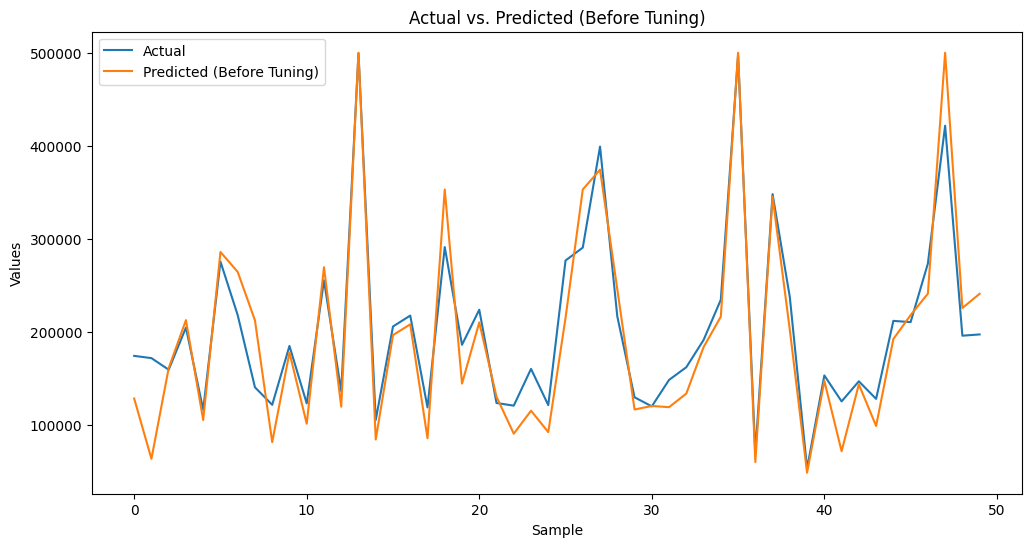

In [43]:
test_before_tuning = pd.DataFrame({'Predicted (Before Tuning)': y_pred, 'Actual': y_test})

test_before_tuning = test_before_tuning.reset_index()
test_before_tuning = test_before_tuning.drop(['index'], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(test_before_tuning[:50])
plt.title('Actual vs. Predicted (Before Tuning)')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.legend(['Actual', 'Predicted (Before Tuning)'])
plt.show()


### **After Tuning Results**

In [44]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,47253.310331,31019.296161,0.177373


### **Actual vs. Predicted (After Tuning)**

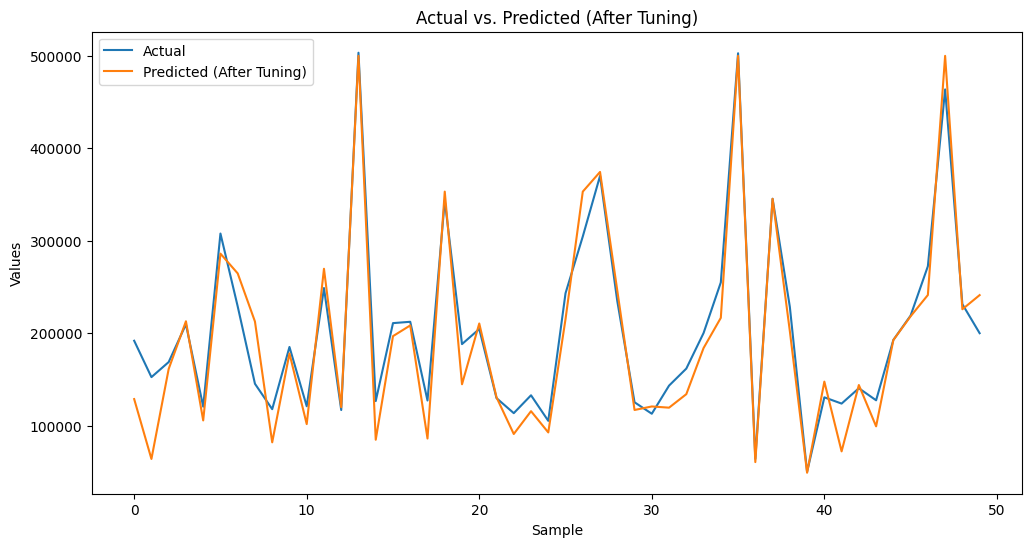

In [45]:
test_after_tuning = pd.DataFrame({'Predicted (After Tuning)': y_pred_xgb_tuning, 'Actual': y_test})

test_after_tuning = test_after_tuning.reset_index()
test_after_tuning = test_after_tuning.drop(['index'], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(test_after_tuning[:50])
plt.title('Actual vs. Predicted (After Tuning)')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.legend(['Actual', 'Predicted (After Tuning)'])
plt.show()


### **Conclusion**

- Berdasarkan pemodelan yang telah dilakukan, dapat disimpulkan bahwa model regresi XGBoost merupakan model terbaik untuk memprediksi harga rumah di California.

- Model XGBoost yang telah disesuaikan menunjukkan kinerja terbaik dengan RMSE sekitar $48,696 dan MAE sekitar $32,826, dan melalui proses hiperparameter tuning, performanya berhasil ditingkatkan dengan RMSE lebih rendah sekitar $47,253 dan MAE sekitar $31,019.

- Model ini memberikan pemilik rumah, pembeli, dan profesional real estate kemampuan untuk membuat keputusan harga berdasarkan wilayah yang dekat dengan laut yang lebih terinformasi.

- Perusahaan dapat menggunakan model ini untuk memberikan perkiraan harga rumah yang lebih akurat kepada klien mereka, memudahkan pemilik rumah untuk menentukan harga sewa atau penjualan yang optimal.

- Namun, perlu diingat bahwa model ini memiliki keterbatasan dalam hal cakupan fitur. Model ini lebih fokus pada faktor kedekatan dengan laut dan tidak mempertimbangkan faktor lain seperti ukuran rumah, jumlah kamar, atau fitur properti lainnya yang juga dapat memengaruhi harga. Oleh karena itu, hasil prediksi tetap harus diperlakukan dengan hati-hati dan dapat digunakan bersamaan dengan faktor lain yang relevan dalam pengambilan keputusan harga properti di luar parameter model.

### **Recommendation**

- Model dapat diperkaya dengan penambahan fitur-fitur penting seperti ukuran rumah, jumlah kamar, atau atribut properti lainnya yang memengaruhi harga. Data tambahan ini dapat meningkatkan akurasi prediksi.

-  Proses pembersihan data yang lebih cermat dapat membantu menghilangkan data yang tidak valid atau outliers yang dapat mengganggu model. Ini akan meningkatkan kualitas data yang digunakan untuk pelatihan.

- Mengevaluasi penggunaan model yang lebih kompleks atau ensambel model untuk memeriksa apakah model tersebut dapat memberikan hasil yang lebih baik. Dan meningkatkan akurasi model pada bagian hyperparameter tuning menggunakan Gridsearch.

### **Save Model**

In [46]:
import pickle

# best model
xgbc_tuning = random_xgb.best_estimator_
xgbc_tuning

# fit
xgbc_tuning.fit(X, y)

# save with pickle
pickle.dump(xgbc_tuning, open('model_xgboost.sav', 'wb'))

In [47]:
# load model

model_loaded = pickle.load(open('model_xgboost.sav', 'rb'))
model_loaded 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_rbst_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rbst_scaler',
                                                                   RobustScaler())]),
                                                  Index(['households', 'median_income', 'population', 'total_bedrooms',
       'total_rooms'],
      dtype='object')),
                                                 ('num_std_pipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   Standa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.060000000000000005, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=400, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

### **References**

- Xu, C. (2023). Housing price forecast based on XGBoost algorithm house price: advanced regression techniques (p. 57). SPIE-Intl Soc Optical Eng. https://doi.org/10.1117/12.2656904

- Et. al., J. A. (2021). Prediction of House Price Using XGBoost Regression Algorithm. Turkish Journal of Computer and Mathematics Education (TURCOMAT), 12(2). https://doi.org/10.17762/turcomat.v12i2.1870